In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Volumetric_features.csv')
x = [['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter']]
y = [['Age']]

In [3]:
df.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [4]:
df.columns

Index(['S.No', 'Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent',
       'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
       'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum',
       '3rd-Ventricle',
       ...
       'rh_supramarginal_thickness', 'rh_frontalpole_thickness',
       'rh_temporalpole_thickness', 'rh_transversetemporal_thickness',
       'rh_insula_thickness', 'rh_MeanThickness_thickness',
       'BrainSegVolNotVent.2', 'eTIV.1', 'Age', 'dataset'],
      dtype='object', length=141)

In [5]:
df.iloc[0]

S.No                            1.000000e+00
Left-Lateral-Ventricle          2.291690e+04
Left-Inf-Lat-Vent               9.827000e+02
Left-Cerebellum-White-Matter    1.519670e+04
Left-Cerebellum-Cortex          5.579640e+04
                                    ...     
rh_MeanThickness_thickness      2.336350e+00
BrainSegVolNotVent.2            1.093846e+06
eTIV.1                          1.619603e+06
Age                             8.500000e+01
dataset                         1.000000e+00
Name: 0, Length: 141, dtype: float64

In [6]:
df.iloc[:, df.columns != 'Age']



,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.648,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.660,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.597,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.604,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.597,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.457,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.497,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.407,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.700,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,9


In [7]:
df.iloc[:, 139]

0       85
1       85
2       86
3       87
4       89
        ..
4221    79
4222    79
4223    84
4224    80
4225    86
Name: Age, Length: 4226, dtype: int64

In [8]:
x = df.iloc[:, df.columns != 'Age']
y = df.iloc[:, 139]


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression()

In [11]:
y_pred=linreg.predict(x_test)
y_pred

array([83.1330925 , 53.77023864, 82.81337568, 81.20348298, 64.43744566,
       73.11355911, 67.09293577, 78.19673997, 70.76320591, 78.0040068 ,
       72.25062136, 65.98832185, 79.09840117, 73.30348154, 78.43217363,
       62.94191017, 79.56783768, 57.575605  , 46.55944199, 60.17397339,
       71.91187231, 80.71595016, 32.08388606, 81.42157088, 77.69425558,
       63.79616046, 87.23345259, 36.6743299 , 53.49559232, 61.84129516,
       80.98518172, 79.58752356, 81.33880933, 54.42213596, 81.83541127,
       65.47656027, 81.31116424, 46.08423807, 40.11722231, 81.4128023 ,
       19.66969755, 56.27052733, 50.43168292, 26.87652205, 71.84257234,
       72.98664471, 81.50002561, 41.5980063 , 82.88230788, 37.20930305,
       73.89726266, 66.91443002, 43.89879045, 37.53120216, 83.91429066,
       85.99648533, 78.53404456, 52.31275736, 80.95349059, 59.20462419,
       85.28609904, 61.14796635, 35.30185055, 37.53480237, 77.6352306 ,
       51.38864071, 60.95798523, 31.46180439, 42.06924513, 67.38

In [12]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 85.70


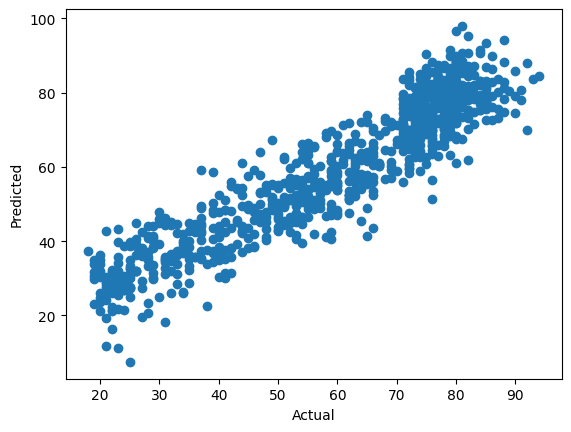

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

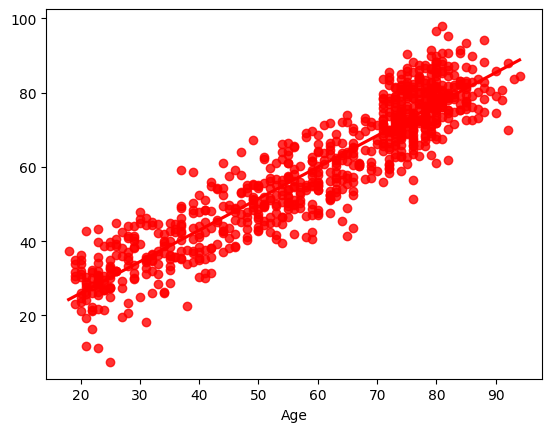

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1612,80,83.133092,-3.133092
2726,58,53.770239,4.229761
2242,86,82.813376,3.186624
4130,78,81.203483,-3.203483
3973,68,64.437446,3.562554
...,...,...,...
907,71,83.733271,-12.733271
80,85,86.804525,-1.804525
257,76,85.658882,-9.658882
295,82,78.027348,3.972652


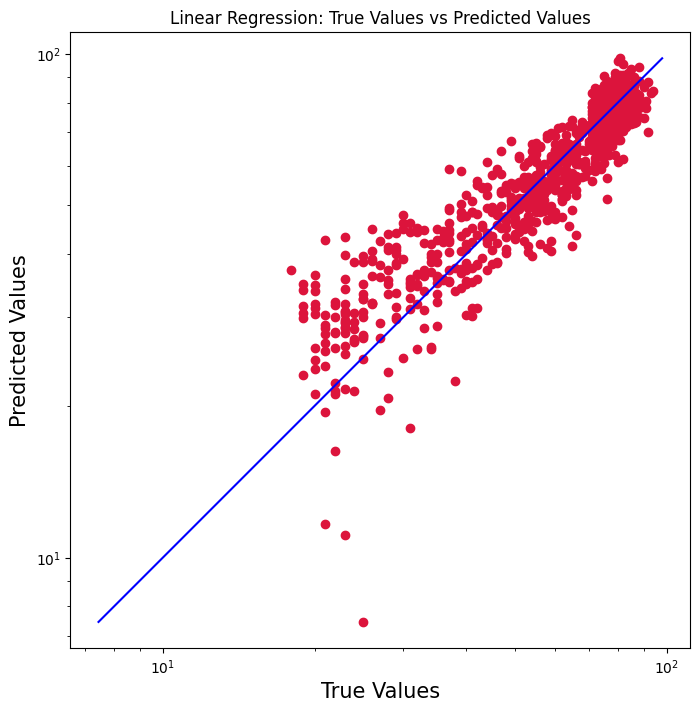

In [19]:
true_val = y_test
pred_val = linreg.predict(x_test)
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Linear Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()